In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression


In [9]:
df = pd.read_csv('/home/aliciescont/Documents/Github/Omdena/omdena-iraq-gun-violence/src/tasks/task-6-data-visualization-documentation/data/attacks2020.csv', parse_dates=True)
df.head()

,Date,Location,Dead,Injured,Details
0,11-Mar-20,Baghdad,3,0,2020 Camp Taji attacks - Three soldiers - two ...
1,28-Aug-20,Al-Maamel,2,17,At least 2 people were killed and another 17 w...
2,30-Aug-20,Al-Haytawin,1,2,ISIS kill one and injured two others in Al-Hay...
3,1-Sep-20,Kirkuk,2,0,A woman was killed by a suicide bombing in Kir...
4,1-Sep-20,Kirkuk,1,1,Insurgents from the Islamic State of Iraq and ...


In [10]:
df.dropna(inplace=True)
df.isnull().sum()

Date        0
Location    0
Dead        0
Injured     0
Details     0
dtype: int64

In [11]:
import plotly.express as px
df = df.sort_values(by="Date", ascending="True")
df['total_casualties'] = df['Dead']+df['Injured']
fig = px.bar(df, x="Location", y="total_casualties", title="Total casualties by violent event")
fig.show()


In [13]:
fig = px.line(df, x="Date", y=df.columns[2:4], title="Casualties in Iraq due to violence acts")
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x")
fig.show()

# Time Series analysis - WIP

In [14]:

df['Date'] = pd.to_numeric(pd.to_datetime(df['Date']))
#df.dtypes

/tmp/ipykernel_29501/753284460.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



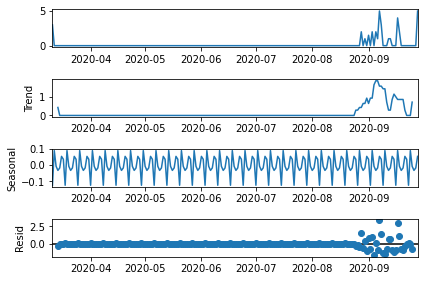

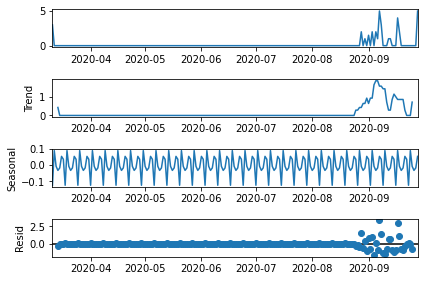

In [20]:
import statsmodels.api as sm

#set index to date
df_ts_dead = df[['Date', 'Dead']]
df_ts_dead.dropna(inplace=True)
df_ts_dead['Date'] = pd.to_datetime(df['Date'])
df_ts_dead = df_ts_dead.set_index('Date').resample('1D').mean()
df_ts_dead = df_ts_dead.fillna(0)

decomposition = sm.tsa.seasonal_decompose(df_ts_dead, model='additive')

decomposition.plot()


The previous plots are done resample data daily, but not sure about of this, needs to do more tests